<a href="https://colab.research.google.com/github/ajinkyajumde/EDA-with-TSF/blob/main/GIVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is the expected forecast for Dec closure? Feel free to use time series or any predictive technique to determine the same. You may take the help of R as well. In case legacy data is needed, please feel free to make assumptions
2. An org leader feels that your conversion rates are dropping, what could be your response to the same? 
3. Do you see any discrepency in the data? How would you clean up the same?
4. What insights can you draw from here?

# **Importing and Creating Data-Frame**

In [141]:
import pandas as pd

In [142]:
from datetime import datetime

In [143]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                   # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
path='/content/drive/MyDrive/1644992506125_1644992504891_Excel Sample_BA (1) (1).xlsx'
df=pd.read_excel(path,header=1)

In [147]:
df=df.drop(columns='Unnamed: 0')

In [148]:
df.head()

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,2021-09-01,6012,715,2538,4738,0.422156,13421,4098,0.305342,1316,0.098055,0.321132,460,0.034275
1,2021-09-02,9327,617,2364,5725,0.253458,15858,5068,0.319586,1313,0.082797,0.259077,521,0.032854
2,2021-09-03,10415,786,1552,6222,0.149016,15832,4669,0.294909,1214,0.076680,0.260013,311,0.019644
3,2021-09-04,12312,765,2736,6258,0.222222,17144,5023,0.292989,1328,0.077462,0.264384,435,0.025373
4,2021-09-05,15719,944,3288,5532,0.209174,18753,4599,0.245241,1393,0.074281,0.302892,438,0.023356


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   112 non-null    datetime64[ns]
 1   New Installs           112 non-null    int64         
 2   Returning Users        112 non-null    int64         
 3   Uninstalls             112 non-null    int64         
 4   Net new installs       112 non-null    int64         
 5   Uninstall rate         112 non-null    float64       
 6   DAU                    112 non-null    int64         
 7   Unique Page Views      112 non-null    int64         
 8   Page view conversion   112 non-null    float64       
 9   Add to Cart            112 non-null    int64         
 10  A2C Conv               112 non-null    float64       
 11  AddtoCart (Prod page)  112 non-null    float64       
 12  Order Comp             112 non-null    int64         
 13  Overa

From the above step it is clear that there are no null values in the dataset and we have data for 112 days. We get brief knowledge about the data types each column carries and so we can move ahed with the analysis.

In [150]:
df.describe()

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,12236.267857,1075.285714,3281.258929,7384.741071,0.278487,21885.580357,6212.723214,0.285406,1618.160714,0.073822,0.260497,482.642857,0.022786
std,3901.796555,347.313043,1351.596878,2127.472373,0.102674,6146.255215,1989.873558,0.049519,610.822405,0.016065,0.044942,150.517836,0.006579
min,4709.000000,435.000000,970.000000,3416.000000,0.130152,11342.000000,3256.000000,0.163178,704.000000,0.043668,0.156836,171.000000,0.010083
25%,9519.000000,812.750000,2296.750000,5643.750000,0.193951,16480.250000,4480.750000,0.246646,1190.500000,0.062460,0.229911,367.250000,0.017611
50%,11909.000000,995.000000,3075.500000,7271.000000,0.262870,20938.000000,5707.000000,0.284797,1416.000000,0.073877,0.264091,460.000000,0.022383
75%,15049.250000,1401.000000,4096.750000,8951.000000,0.350034,26647.000000,7764.500000,0.314308,1957.000000,0.081813,0.291931,586.000000,0.026965
max,20939.000000,1766.000000,7560.000000,13164.000000,0.660862,37544.000000,11345.000000,0.409564,3434.000000,0.112963,0.359590,1053.000000,0.040838


Using the above data we can say that none of the columns have outliers that can impact our analysis and so there is not much tedious data wrangling to be done.

In [151]:
forecast_model=df[['Date','Order Comp']]

In [152]:
forecast_model.head()

,Date,Order Comp
0,2021-09-01,460
1,2021-09-02,521
2,2021-09-03,311
3,2021-09-04,435
4,2021-09-05,438


In [153]:
forecast_model.tail()

,Date,Order Comp
107,2021-12-17,772
108,2021-12-18,784
109,2021-12-19,588
110,2021-12-20,783
111,2021-12-21,663


We created a separate dataframe in order to use time series forecasting model on the order comp column so as to know about the expected sales by the end of the December.

# **What is the expected forecast for Dec closure?**

<Figure size 1440x720 with 0 Axes>

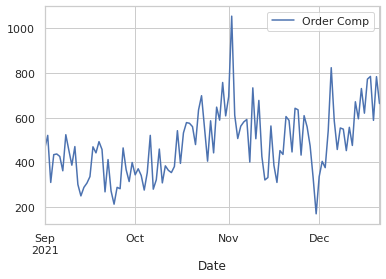

In [154]:
plt.figure(figsize=(20,10))
forecast_model.plot(x='Date')

The trend seems to be upward but we use dickey fuller test to verify the stationarity of the given data.

In [155]:
from statsmodels.tsa.stattools import adfuller

In [156]:
test_result=adfuller(forecast_model['Order Comp'])


In [157]:
def adfuller_test(quantity):
    result=adfuller(quantity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [158]:
adfuller_test(forecast_model['Order Comp'])

ADF Test Statistic : -2.594101450469276
p-value : 0.09422251630366735
#Lags Used : 2
Number of Observations Used : 109
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


From the above analysis it is clear that we don't have a stationary series and so we try to make it stationery using the differencing.

In [159]:
forecast_model['Order Comp diff'] = forecast_model['Order Comp'] - forecast_model['Order Comp'].shift(1)

In [161]:
forecast_model.head()

,Date,Order Comp,Order Comp diff,Seasonal Order Comp diff
0,2021-09-01,460,NaN,NaN
1,2021-09-02,521,61.0,NaN
2,2021-09-03,311,-210.0,NaN
3,2021-09-04,435,124.0,NaN
4,2021-09-05,438,3.0,NaN


<Figure size 1440x720 with 0 Axes>

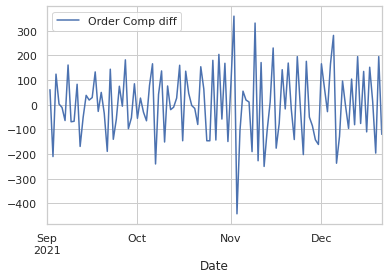

In [198]:
plt.figure(figsize=(20,10))
forecast_model.plot(x='Date',y='Order Comp diff')

In [162]:
## Again test dickey fuller test
adfuller_test(forecast_model['Order Comp diff'].dropna())

ADF Test Statistic : -6.755994635637674
p-value : 2.8708915962385677e-09
#Lags Used : 7
Number of Observations Used : 103
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


After using the differencing of 1st order, we have a stationery series and so we can plot ACF and PACF for this model in order to get the values for Forecasting Model.

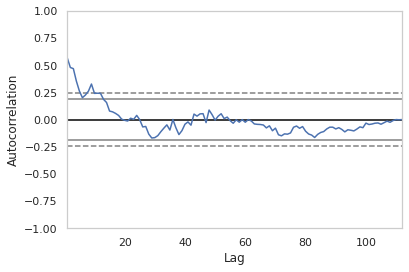

In [165]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(forecast_model['Order Comp'])
plt.show()

In [166]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

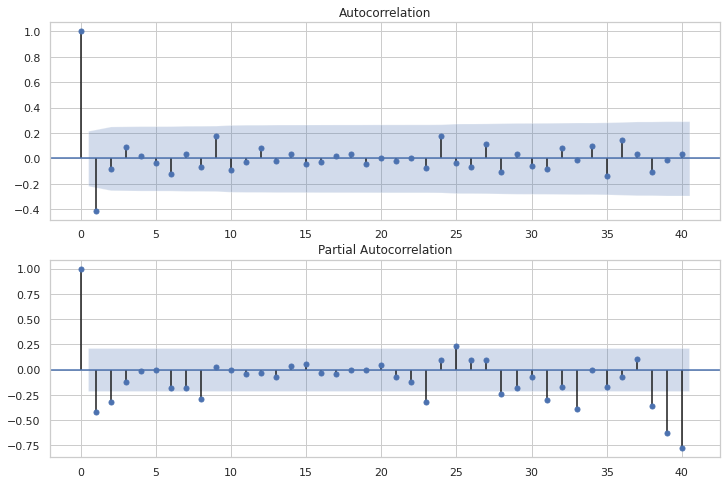

In [167]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(forecast_model['Order Comp diff'].iloc[30:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(forecast_model['Order Comp diff'].iloc[30:],lags=40,ax=ax2)

In [169]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [170]:
model=SARIMAX(forecast_model['Order Comp'],order=(1, 1, 3),seasonal_order=(1,1,3,30))
results=model.fit()



After using multiple iterations for AIC we get p,d,q values to be 1,1,3 and so we proceed with the forecasting.

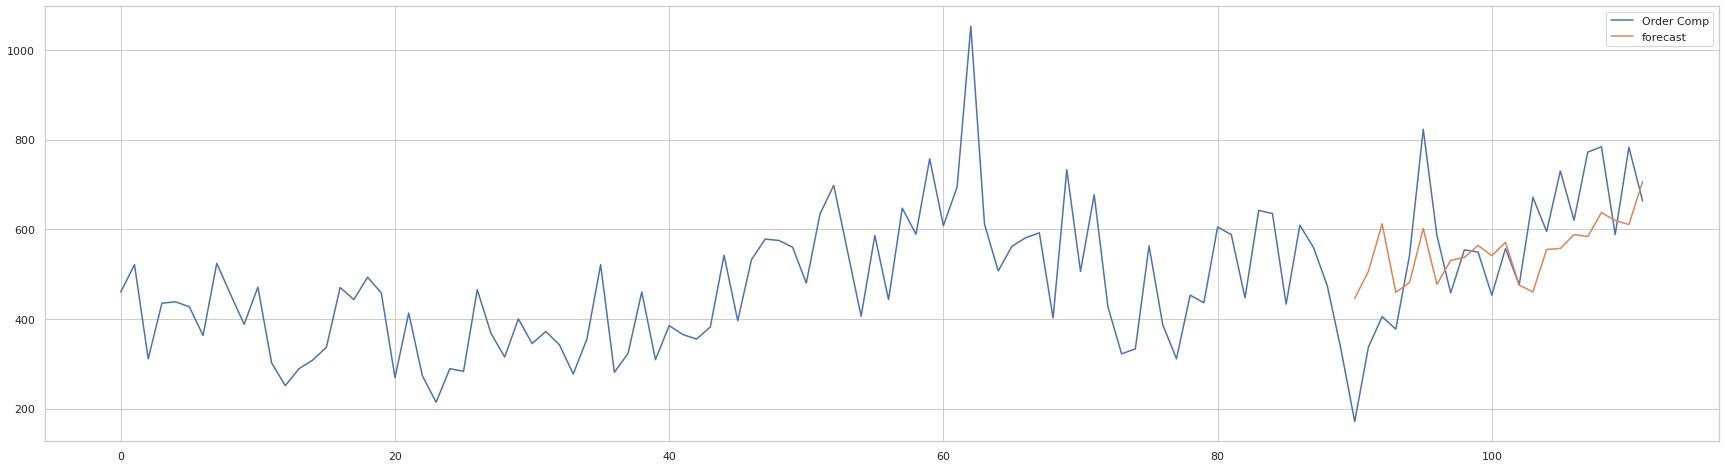

In [171]:
forecast_model['forecast']=results.predict(start=90
                              ,end=120,dynamic=True)
forecast_model[['Order Comp','forecast']].plot(figsize=(30,8)) 

In [172]:
forecast_model.tail(50)

,Date,Order Comp,Order Comp diff,Seasonal Order Comp diff,forecast
62,2021-11-02,1053,359.0,711.0,NaN
63,2021-11-03,611,-442.0,334.0,NaN
64,2021-11-04,507,-104.0,152.0,NaN
65,2021-11-05,562,55.0,41.0,NaN
66,2021-11-06,581,19.0,300.0,NaN
67,2021-11-07,592,11.0,269.0,NaN
68,2021-11-08,402,-190.0,-58.0,NaN
69,2021-11-09,733,331.0,424.0,NaN
70,2021-11-10,506,-227.0,121.0,NaN
71,2021-11-11,677,171.0,312.0,NaN


In [173]:
from pandas.tseries.offsets import DateOffset
future_dates=['2021-12-'+str(x) for x in range(22,32)]


In [174]:
future_datest_df=pd.DataFrame(future_dates,columns=['date'])


In [175]:
future_datest_df

,date
0,2021-12-22
1,2021-12-23
2,2021-12-24
3,2021-12-25
4,2021-12-26
5,2021-12-27
6,2021-12-28
7,2021-12-29
8,2021-12-30
9,2021-12-31


In [176]:
future_datest_df=pd.DataFrame(future_dates,columns=['date'])


In [177]:
future_df=pd.concat([forecast_model,future_datest_df]).reset_index()


In [178]:
future_df.tail()

,index,Date,Order Comp,Order Comp diff,Seasonal Order Comp diff,forecast,date
117,5,NaT,NaN,NaN,NaN,NaN,2021-12-27
118,6,NaT,NaN,NaN,NaN,NaN,2021-12-28
119,7,NaT,NaN,NaN,NaN,NaN,2021-12-29
120,8,NaT,NaN,NaN,NaN,NaN,2021-12-30
121,9,NaT,NaN,NaN,NaN,NaN,2021-12-31


<Figure size 1440x720 with 0 Axes>

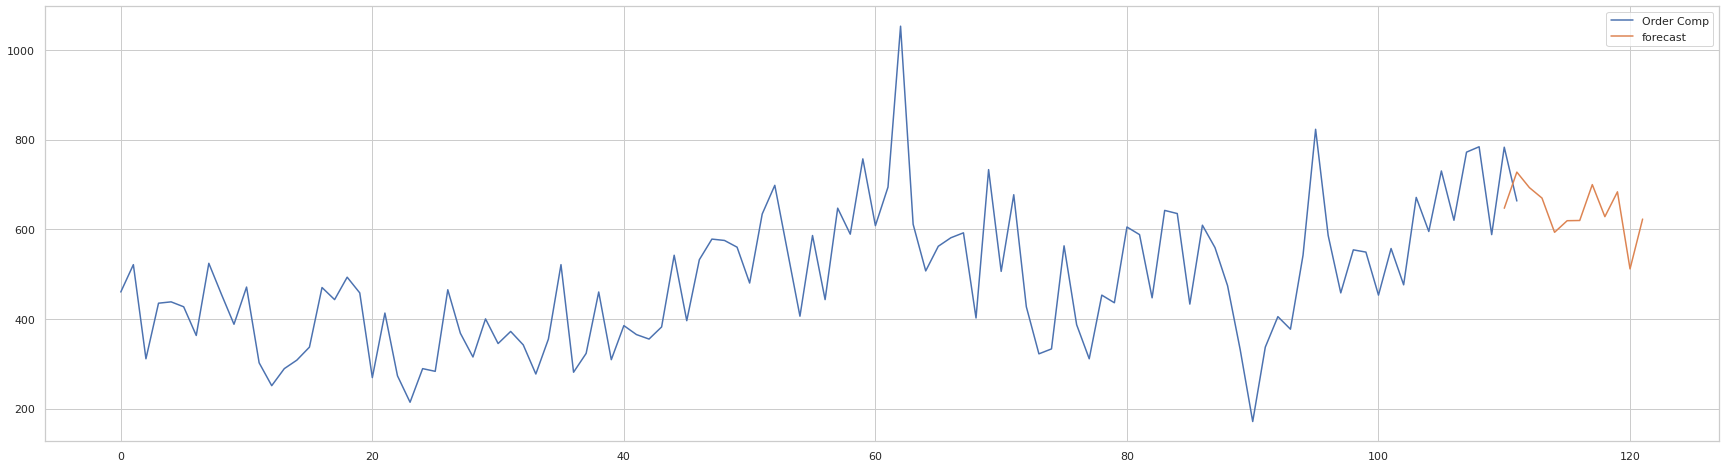

In [179]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
future_df['forecast']=results.predict(start=
                              110,end=121,dynamic=True)
future_df[['Order Comp','forecast']].plot(figsize=(30,8))

And so from the given data, we tried to forecast the Orders to be completed by the end.

# **An org leader feels that your conversion rates are dropping, what could be your response to the same?**

In [180]:
df.head()

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,2021-09-01,6012,715,2538,4738,0.422156,13421,4098,0.305342,1316,0.098055,0.321132,460,0.034275
1,2021-09-02,9327,617,2364,5725,0.253458,15858,5068,0.319586,1313,0.082797,0.259077,521,0.032854
2,2021-09-03,10415,786,1552,6222,0.149016,15832,4669,0.294909,1214,0.076680,0.260013,311,0.019644
3,2021-09-04,12312,765,2736,6258,0.222222,17144,5023,0.292989,1328,0.077462,0.264384,435,0.025373
4,2021-09-05,15719,944,3288,5532,0.209174,18753,4599,0.245241,1393,0.074281,0.302892,438,0.023356


<Figure size 1440x720 with 0 Axes>

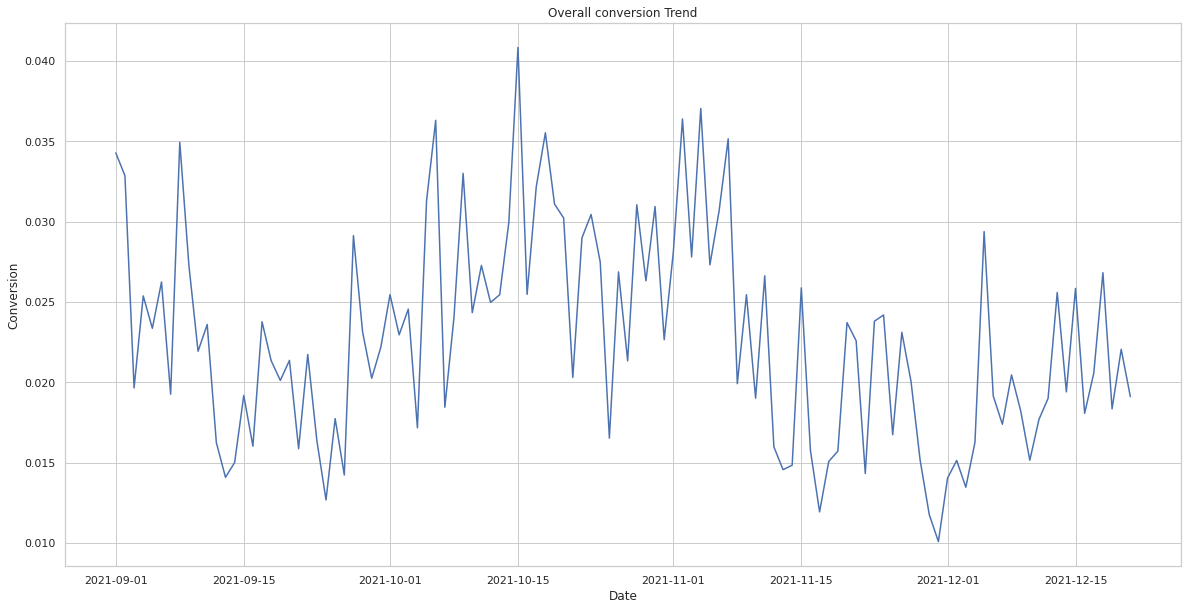

<Figure size 1440x720 with 0 Axes>

In [181]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
v=sns.lineplot(x=df['Date'],y=df['Overall Conv'])
v.set_title('Overall conversion Trend')
v.set_xlabel('Date')
v.set_ylabel("Conversion")
plt.figure(figsize=(20,10))

The overall conversion trend seems to be declining which seems to be area of concern. 

# **Do you see any discrepency in the data? How would you clean up the same?**

In [182]:
# duplicate
len(df[df.duplicated()])

0

In [183]:
df.isnull().sum()

Date                     0
New Installs             0
Returning Users          0
Uninstalls               0
Net new installs         0
Uninstall rate           0
DAU                      0
Unique Page Views        0
Page view conversion     0
Add to Cart              0
A2C Conv                 0
AddtoCart (Prod page)    0
Order Comp               0
Overall Conv             0
dtype: int64

In [184]:
numerical_columns=list(df.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['New Installs ', 'Returning Users ', 'Uninstalls ', 'Net new installs ',
       'Uninstall rate', 'DAU ', 'Unique Page Views', 'Page view conversion',
       'Add to Cart', 'A2C Conv', 'AddtoCart (Prod page)', 'Order Comp',
       'Overall Conv'],
      dtype='object')

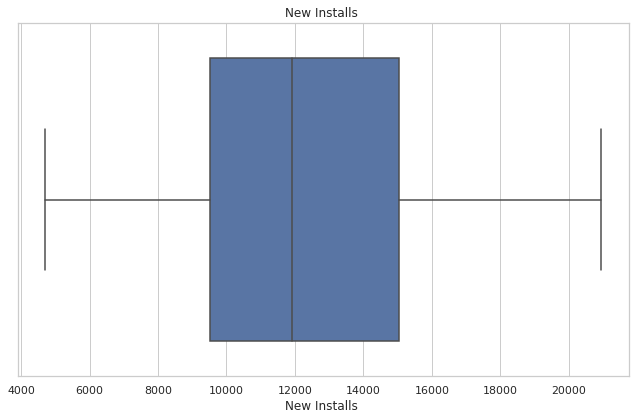

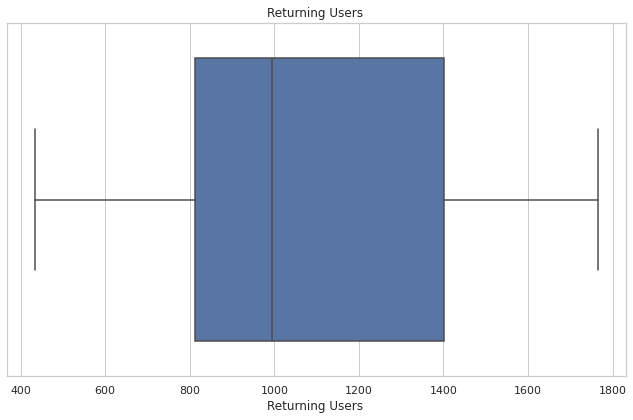

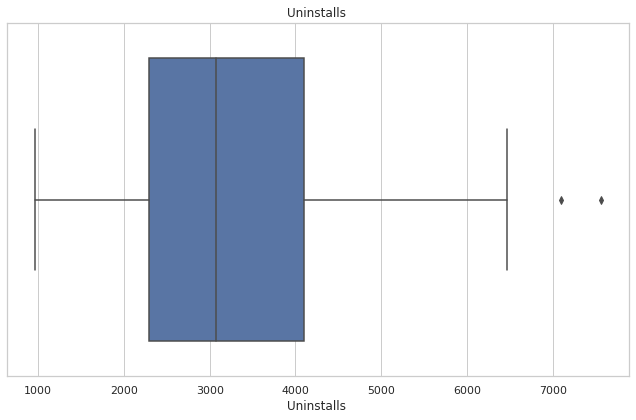

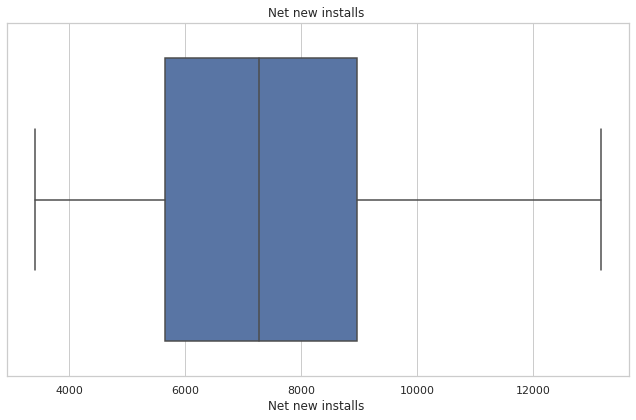

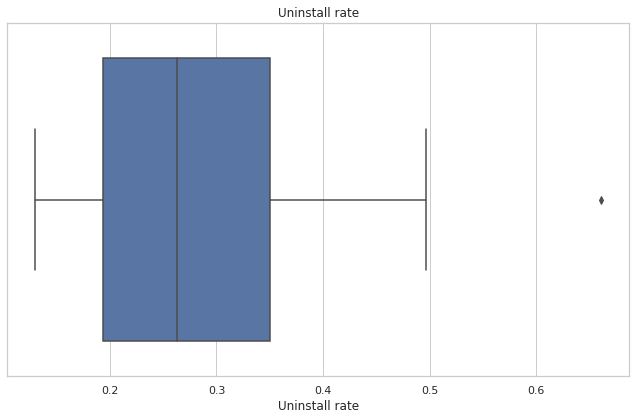

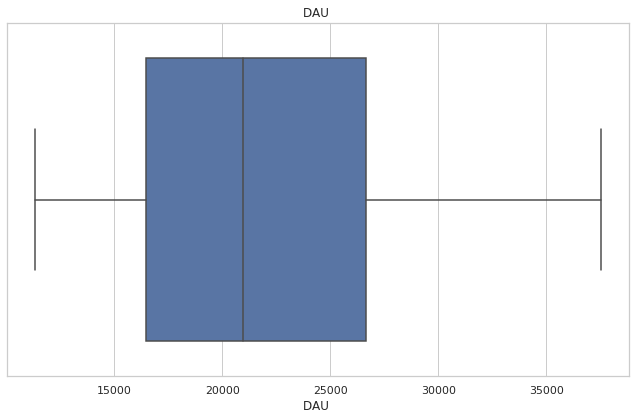

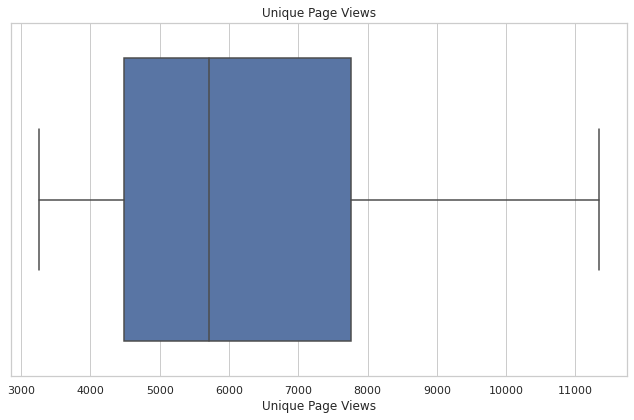

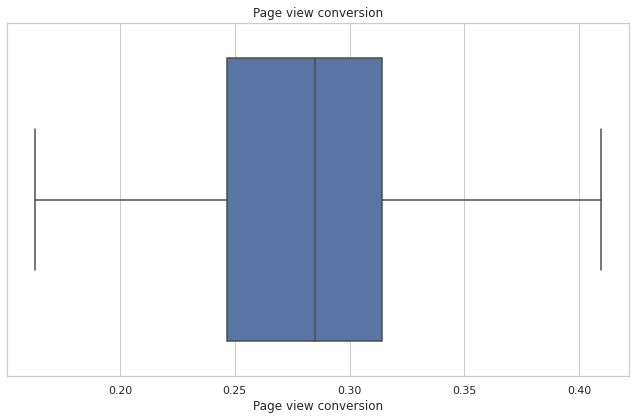

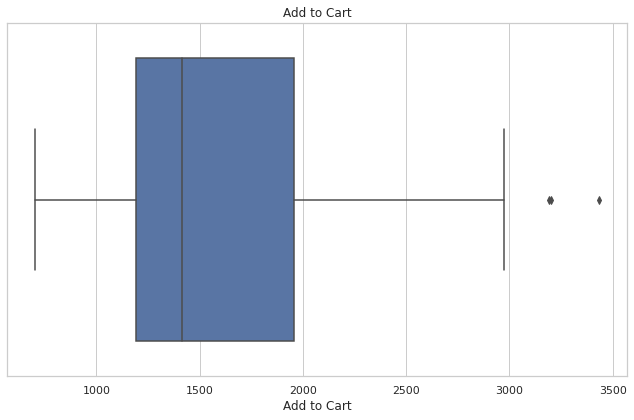

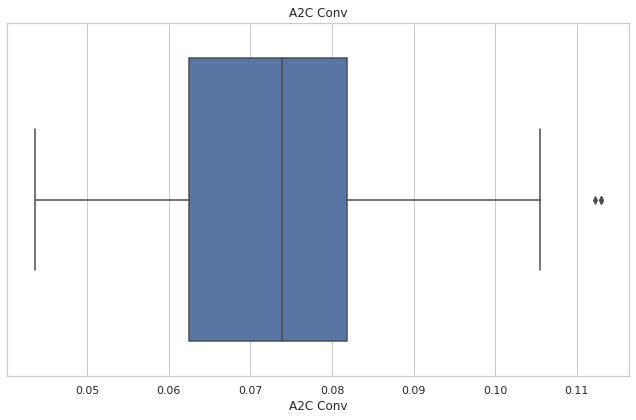

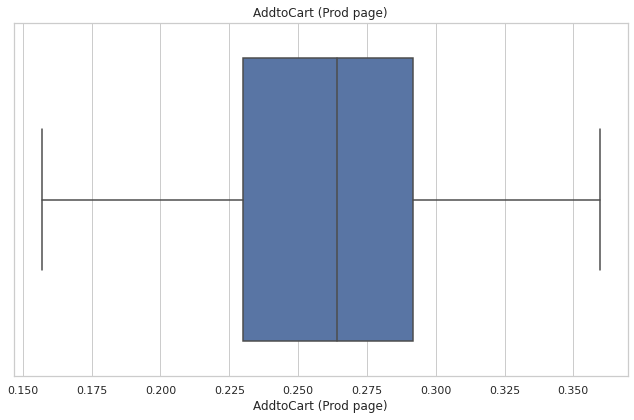

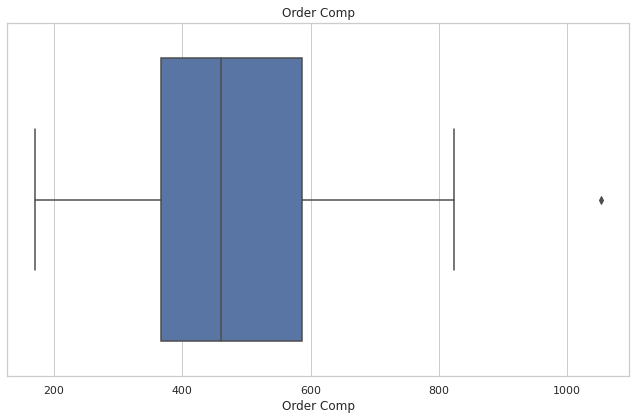

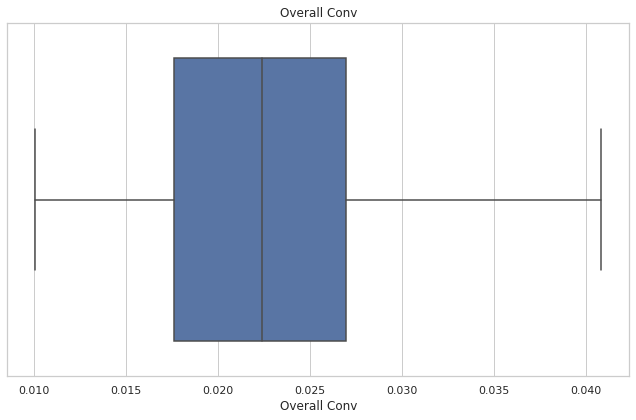

In [185]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=df[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

The data has no duplicates and no null values that largely impact any analysis. The outliers seem to be very less for most of the columns and so we can proceed further.

# **What insights can you draw from here?**

In [194]:
df['month_of_date'] = df['Date'].dt.month
df['day_of_date'] = df['Date'].dt.day
df['Week_Number'] = df['Date'].dt.week


In [187]:
df.head()

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv,month_of_date,day_of_date
0,2021-09-01,6012,715,2538,4738,0.422156,13421,4098,0.305342,1316,0.098055,0.321132,460,0.034275,9,1
1,2021-09-02,9327,617,2364,5725,0.253458,15858,5068,0.319586,1313,0.082797,0.259077,521,0.032854,9,2
2,2021-09-03,10415,786,1552,6222,0.149016,15832,4669,0.294909,1214,0.076680,0.260013,311,0.019644,9,3
3,2021-09-04,12312,765,2736,6258,0.222222,17144,5023,0.292989,1328,0.077462,0.264384,435,0.025373,9,4
4,2021-09-05,15719,944,3288,5532,0.209174,18753,4599,0.245241,1393,0.074281,0.302892,438,0.023356,9,5


In [188]:
df.columns

Index(['Date', 'New Installs ', 'Returning Users ', 'Uninstalls ',
       'Net new installs ', 'Uninstall rate', 'DAU ', 'Unique Page Views',
       'Page view conversion', 'Add to Cart', 'A2C Conv',
       'AddtoCart (Prod page)', 'Order Comp', 'Overall Conv', 'month_of_date',
       'day_of_date'],
      dtype='object')

In [189]:
v=df.groupby('month_of_date')[['New Installs ','Uninstalls ']].sum().reset_index()
v

,month_of_date,New Installs,Uninstalls
0,9,331280,82172
1,10,298511,76554
2,11,409855,119734
3,12,330816,89041


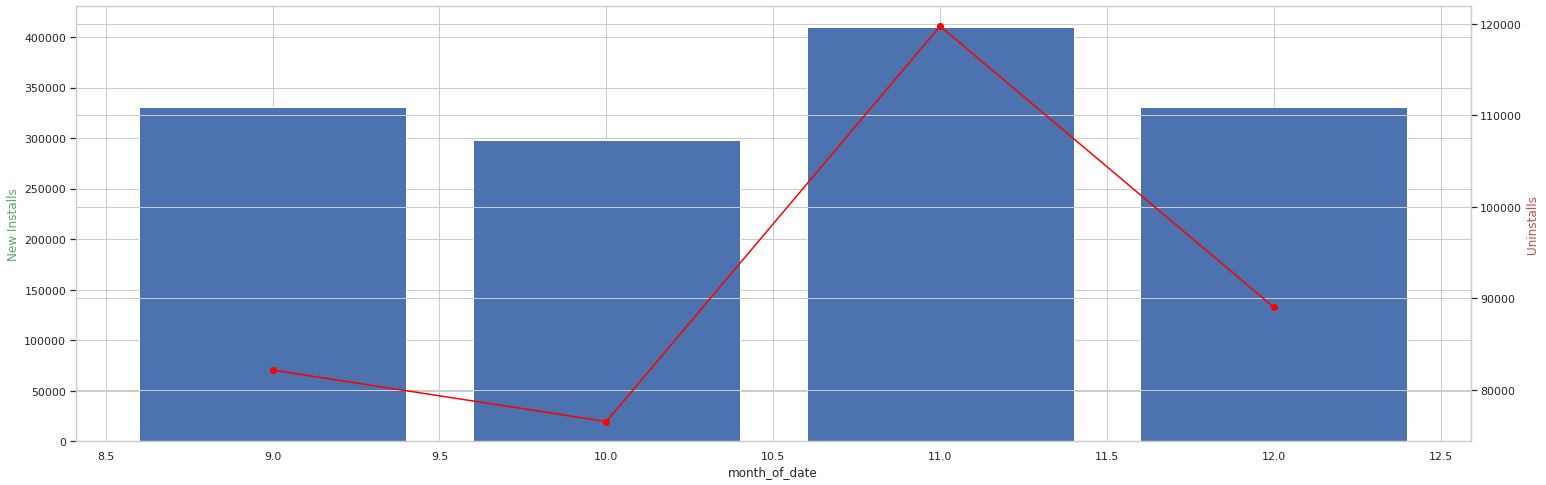

In [191]:
x=list(v['month_of_date'])
y=list(v['New Installs '])
y1=list(v['Uninstalls '])

fig, ax1 = plt.subplots(figsize=(25, 8))

ax2 = ax1.twinx()
ax1.bar(x, y)
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('month_of_date')
ax1.set_ylabel('New Installs', color='g')
ax2.set_ylabel('Uninstalls', color='r')

plt.show()

The above figure depicts the installs and uninstalls for all the months the uninstalls seem to have doubled over the period however the installs remained within the same range. The installs and uninstalls were at peak in the month of November.

Text(0, 0.5, 'Net Installs')

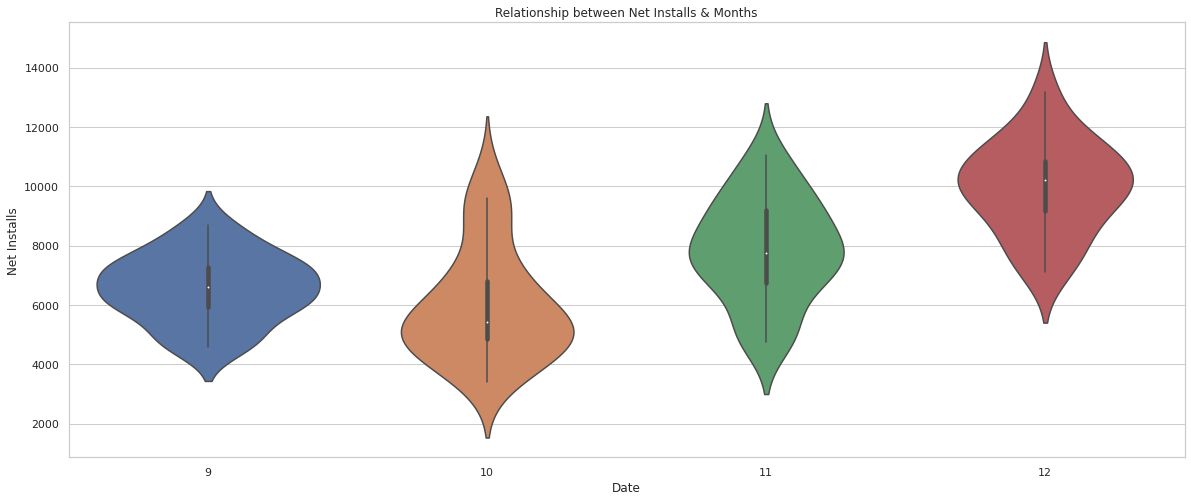

In [193]:
plt.figure(figsize=(20,8))
#using violinplot to showcase density and distribtuion of prices

viz_2=sns.violinplot(data=df, x='month_of_date', y='Net new installs ')
viz_2.set_title('Relationship between Net Installs & Months')
viz_2.set_xlabel('Date')
viz_2.set_ylabel("Net Installs")

The violin chart shows the monthwise net installs.

Text(0, 0.5, 'Number of Orders')

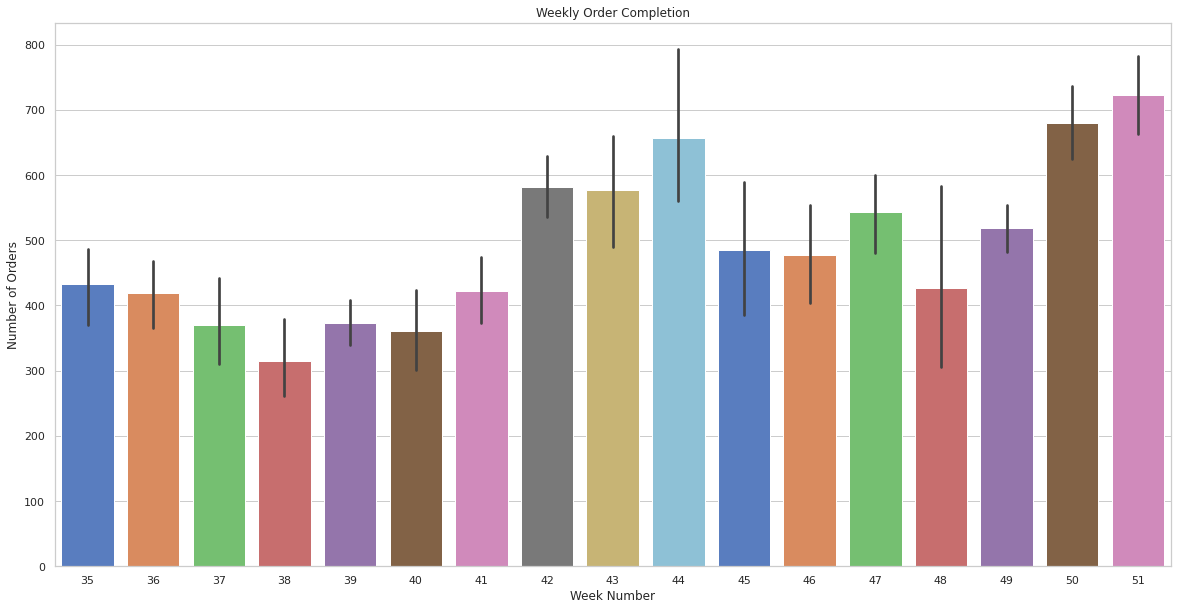

In [197]:
plt.figure(figsize=(20,10))
v=df.groupby('Week_Number')['Order Comp'].sum().reset_index()
v=sns.barplot(x=df['Week_Number'],y=df['Order Comp'],palette="muted")
v.set_title('Weekly Order Completion')
v.set_xlabel('Week Number')
v.set_ylabel("Number of Orders")

The figure shows over the period of time the order completion has increased significantly.

# **Conclusion**

1.  We have tried to forecast the demand for December End.
2.  Decline in conversion rate seems to be an area of concern. However, the number of orders have imcreased over the period of time. This shows the kind of business that the company can attract by further analysing the product wise reason for decline inn conversion.
3.  The dataset seems to be free of any null values or duplicates so we can move ahed with the dataset for analysis.
4.  We tried to draw more insights from the data.